Modified Training Set Accuracy: 100.00%
Modified Test Set Accuracy: 51.11%
Incorrectly predicted indices in the modified test set: [ 0  3  5  6  7  8  9 11 13 15 19 21 24 28 31 32 33 34 36 38 40 41]


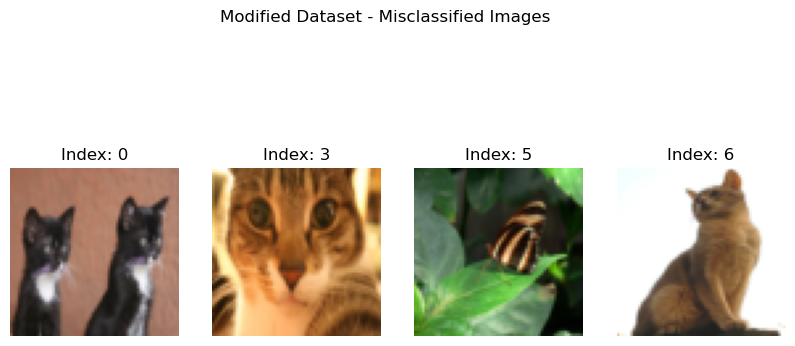

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Sigmoid function with numerical stability
def sigmoid(z):
    """
    Compute the sigmoid of z in a numerically stable way.
    Args:
        z: Input value or array.
    Returns:
        Sigmoid of z.
    """
    return np.where(z >= 0, 
                    1 / (1 + np.exp(-z)), 
                    np.exp(z) / (1 + np.exp(z)))

# Logistic regression model
def logistic_regression(X, Y, num_epochs, learning_rate):
    """
    Train a logistic regression model using gradient descent.
    Args:
        X: Training data of shape (features, samples).
        Y: Training labels of shape (1, samples).
        num_epochs: Number of iterations for training.
        learning_rate: Learning rate for gradient descent.
    Returns:
        w: Trained weights of shape (features, 1).
        b: Trained bias term (scalar).
    """
    # Initialize weights and bias
    w = np.random.randn(X.shape[0], 1) * 0.01  # Small random initialization
    b = 0.0

    for epoch in range(num_epochs):
        # Forward propagation
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)  # Sigmoid activation

        # Compute gradients
        dJdw = np.dot(X, (A - Y).T) / Y.shape[1]
        dJdb = np.sum(A - Y) / Y.shape[1]

        # Update weights and bias
        w -= learning_rate * dJdw
        b -= learning_rate * dJdb

    return w, b

# Predict function
def predict(X, w, b):
    """
    Make predictions using a logistic regression model.
    Args:
        X: Input data of shape (features, samples).
        w: Trained weights of shape (features, 1).
        b: Trained bias term (scalar).
    Returns:
        Y_pred: Predicted labels of shape (1, samples).
    """
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

# Preprocess data by flattening and normalizing
def preprocess_data(X):
    """
    Flatten and normalize the dataset.
    Args:
        X: Input data of shape (samples, height, width, channels).
    Returns:
        X_processed: Flattened and normalized data of shape (features, samples).
    """
    X = X / 255.0  # Normalize pixel values to [0, 1]
    X = X.reshape(X.shape[0], -1).T  # Flatten and transpose
    return X

# Modify the dataset using the student's ID last digit
def modify_dataset(X_train, Y_train, student_id_last_digit):
    """
    Modify the dataset as described in the problem statement.
    Args:
        X_train: Original training features of shape (samples, height, width, channels).
        Y_train: Original training labels of shape (samples,).
        student_id_last_digit: Last digit of the student's ID.
    Returns:
        new_X_train: Processed training features.
        new_Y_train: Processed training labels.
        new_X_test: Processed test features.
        new_Y_test: Processed test labels.
    """
    train_size = 160 + student_id_last_digit
    new_X_train = preprocess_data(X_train[:train_size])  # Preprocess training data
    new_Y_train = Y_train[:train_size].reshape(1, -1)    # Ensure labels are 2D
    new_X_test = preprocess_data(X_train[train_size:])   # Preprocess test data
    new_Y_test = Y_train[train_size:].reshape(1, -1)     # Ensure labels are 2D
    return new_X_train, new_Y_train, new_X_test, new_Y_test

# Load the dataset
def load_data(train_path, test_path):
    """
    Load the training and test datasets from .h5 files.
    Args:
        train_path: Path to the training .h5 file.
        test_path: Path to the test .h5 file.
    Returns:
        X_train, Y_train, X_test, Y_test
    """
    train_dataset = h5py.File(train_path, 'r')
    test_dataset = h5py.File(test_path, 'r')
    X_train = np.array(train_dataset["train_set_x"][:])
    Y_train = np.array(train_dataset["train_set_y"][:])
    X_test = np.array(test_dataset["test_set_x"][:])
    Y_test = np.array(test_dataset["test_set_y"][:])
    return X_train, Y_train, X_test, Y_test

# Display misclassified images
def display_images(X_orig, indices, title="Misclassified Images"):
    """
    Display images from the original unflattened dataset.
    Args:
        X_orig: Original dataset of shape (samples, height, width, channels).
        indices: Indices of images to display.
        title: Title for the plot.
    """
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(indices[:4]):
        plt.subplot(1, 4, i + 1)
        plt.imshow(X_orig[idx])  # Use the unflattened original data
        plt.title(f"Index: {idx}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Main script
train_path = r"C:\Users\DELL\Documents\2024 AMS 595\hw6\train_catvnoncat.h5"
test_path = r"C:\Users\DELL\Documents\2024 AMS 595\hw6\test_catvnoncat.h5"

# Load data
X_train, Y_train, X_test, Y_test = load_data(train_path, test_path)

# Preprocess and modify dataset
student_id_last_digit = 4
X_train_mod, Y_train_mod, X_test_mod, Y_test_mod = modify_dataset(X_train, Y_train, student_id_last_digit)

# Train the model
num_epochs = 1000
learning_rate = 0.05
w_mod, b_mod = logistic_regression(X_train_mod, Y_train_mod, num_epochs, learning_rate)

# Test the model
Y_pred_train_mod = predict(X_train_mod, w_mod, b_mod)
Y_pred_test_mod = predict(X_test_mod, w_mod, b_mod)
train_accuracy_mod = np.mean(Y_pred_train_mod == Y_train_mod) * 100
test_accuracy_mod = np.mean(Y_pred_test_mod == Y_test_mod) * 100

print(f"Modified Training Set Accuracy: {train_accuracy_mod:.2f}%")
print(f"Modified Test Set Accuracy: {test_accuracy_mod:.2f}%")

# Identify incorrectly predicted indices
incorrect_indices_mod = np.where(Y_pred_test_mod != Y_test_mod)[1]
print(f"Incorrectly predicted indices in the modified test set: {incorrect_indices_mod}")

# Display misclassified images
display_images(X_test, incorrect_indices_mod, title="Modified Dataset - Misclassified Images")
